In [1]:
#### -- 1-1. 모듈 불러오기 -- ####
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
# from torch.autograd import Variable

from matplotlib import pyplot as plt
%matplotlib inline

: 

In [1]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print ('Current cuda device is', device)

NameError: name 'torch' is not defined

In [ ]:
batch_size=50
epoch_num=15
learning_rate=0.0001

In [ ]:
train_data=datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_data=datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

print(f'number of train data: {len(train_data)}')
print(f"number of test data: {len(test_data)}")

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.6MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 482kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.25MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

number of train data: 60000
number of test data: 10000


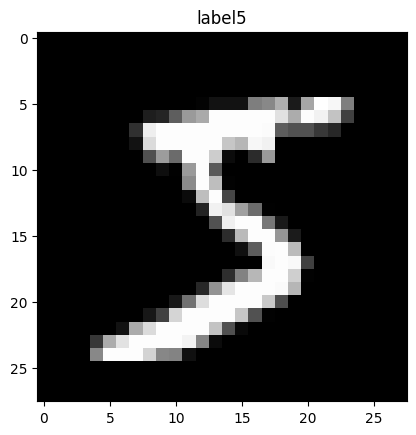

In [ ]:
image, label= train_data[0]

plt.imshow(image.squeeze(), cmap='gray')
plt.title('label%s'%label)
plt.show()

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                           batch_size = batch_size, shuffle = True)
test_loader  = torch.utils.data.DataLoader(dataset = test_data,
                                           batch_size = batch_size, shuffle = True)

first_batch = train_loader.__iter__().__next__()
print('{:15s} | {:<25s} | {}'.format('name', 'type', 'size'))
print('{:15s} | {:<25s} | {}'.format('Num of Batch', '', len(train_loader)))
print('{:15s} | {:<25s} | {}'.format('first_batch', str(type(first_batch)), len(first_batch)))
print('{:15s} | {:<25s} | {}'.format('first_batch[0]', str(type(first_batch[0])), first_batch[0].shape))
print('{:15s} | {:<25s} | {}'.format('first_batch[1]', str(type(first_batch[1])), first_batch[1].shape))

name            | type                      | size
Num of Batch    |                           | 1200
first_batch     | <class 'list'>            | 2
first_batch[0]  | <class 'torch.Tensor'>    | torch.Size([50, 1, 28, 28])
first_batch[1]  | <class 'torch.Tensor'>    | torch.Size([50])


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
#### -- 3-2. Optimizer 및 손실함수 정의 -- ####
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss( )

In [ ]:
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
model.train()
i=0
for epoch in range(epoch_num):
  for data, target in train_loader:
    data=data.to(device)
    target=target.to(device)
    optimizer.zero_grad()
    output=model(data)
    loss=criterion(output, target)
    loss.backward()
    optimizer.step()
    if i%1000==0:
      print(f"train step: {loss.item()}")
    i+1

/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
train step: 0.17540542781352997
train step: 0.10971777141094208
train step: 0.03818405047059059
train step: 0.026996254920959473
train step: 0.07184094190597534
train step: 0.04435747116804123
train step: 0.03632010146975517
train step: 0.027877237647771835
train step: 0.02495582401752472
train step: 0.01152116060256958
train step: 0.012126339599490166
train step: 0.17126642167568207
train step: 0.1541518270969391
train step: 0.03909865394234657
train step: 0.017478013411164284
train step: 0.06689460575580597
train step: 0.016293810680508614
train step: 0.024854784831404686
train step: 0.09625610709190369
train step: 0.027603935450315475
train step: 0.02338789403438568
train step: 0.12971490621566772
train step: 0.06322985887527466
train step: 0.01709645800292492
train step: 0.0793934315443039
train step: 0.021849794313311577
train step: 0.015756962820887566
train step: 0.02497054822742939
train step: 0.02626682072877884
train step: 0.061256885528564

In [ ]:
model.eval()
correct=0
for data, target in test_loader:
  data=data.to(device)
  target=target.to(device)
  output=model(data)
  prediction=output.data.max(1)[1]
  correct+=prediction.eq(target.data).sum()

print('Test set: Accuracy: {:.2f}%'.format(100. * correct / len(test_loader.dataset)))

Test set: Accuracy: 98.95%
